In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()
#import plotly.io as pio
#pio.renderers.default = "svg"
import warnings
warnings.filterwarnings('ignore')

In [2]:
ROOT = '/home/hadoop/Documents/DataScience/SelfStudy/Machine_Learning/Kaggle_Competition/COVID-19'

In [3]:
statewise_data = pd.read_csv(ROOT+'/data_collection/state_wise.csv')
statewise_data.head()

State  Confirmed  Recovered  Deaths  Active    Last_Updated_Time  \
0        Total     441936     248889   14030  178966  23/06/2020 17:37:13   
1  Maharashtra     135796      67706    6283   61793  22/06/2020 23:26:52   
2   Tamil Nadu      62087      34112     794   27181  22/06/2020 20:05:18   
3        Delhi      62655      36602    2233   23820  22/06/2020 21:59:15   
4      Gujarat      27880      19917    1685    6278  22/06/2020 20:37:16   

   Migrated_Other State_code  Delta_Confirmed  Delta_Recovered  Delta_Deaths  \
0              51         TT             1474              752            15   
1              14         MH                0                0             0   
2               0         TN                0                0             0   
3               0         DL                0                0             0   
4               0         GJ                0                0             0   

                                         State_Notes  
0                                                NaN  
1  14 cases were marked as non-covid deaths in MH...  
2  2 deaths cross notified to other states from C...  
3  Delhi bulletins in the morning, containing dat...  
4                                                NaN

In [4]:
#statewise_data['State'].unique()

### MoHFW data

In [5]:
complete_data = pd.read_csv(ROOT+'/data/complete.csv')

In [6]:
complete_data.shape

(3370, 10)

In [7]:
complete_data.tail()

Date Name of State / UT  Latitude  Longitude  \
3365  2020-06-25          Telangana   18.1124    79.0193   
3366  2020-06-25            Tripura   23.9408    91.9882   
3367  2020-06-25      Uttar Pradesh   26.8467    80.9462   
3368  2020-06-25        Uttarakhand   30.0668    79.0193   
3369  2020-06-25        West Bengal   22.9868    87.8550   

      Total Confirmed cases  Death  Cured/Discharged/Migrated  New cases  \
3365                  10444    225                       4361        891   
3366                   1259      1                        897          0   
3367                  19557    596                      12586        664   
3368                   2623     35                       1721         88   
3369                  15173    591                       9702        445   

      New deaths  New recovered  
3365           5            137  
3366           0             90  
3367           8            470  
3368           5            119  
3369          11            484

In [8]:
#complete_data.info()

In [9]:
# Change date column into pandas datetime
complete_data['Date'] = pd.to_datetime(complete_data['Date'], errors = 'coerce')

In [10]:
# No of active cases -- derived column
complete_data['Active'] = complete_data['Total Confirmed cases'] - complete_data['Death'] - complete_data['Cured/Discharged/Migrated']

### Nation Level Daily data

In [11]:
daily_data = pd.read_csv(ROOT+'/data/nation_level_daily.csv')

In [12]:
daily_data.shape

(147, 7)

In [13]:
daily_data.tail()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
142  20 June             15918           411753            13974   
143  21 June             15151           426904             9075   
144  22 June             13560           440464            10879   
145  23 June             15656           456120            10462   
146  24 June             16868           472988            13089   

     Total Recovered  Daily Deceased  Total Deceased  
142           228184             308           13278  
143           237259             426           13704  
144           248138             312           14016  
145           258600             468           14484  
146           271689             424           14908

In [14]:
# convert Date column into pandas datetime datatype after adding year i.e. 2020
daily_data['Date'] = pd.to_datetime(daily_data['Date']+' 2020', errors = 'coerce')

In [15]:
# get total no of active cases 
daily_data['Total Active'] = daily_data['Total Confirmed'] - daily_data['Total Recovered'] - daily_data['Total Deceased']

In [16]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
Date               147 non-null datetime64[ns]
Daily Confirmed    147 non-null int64
Total Confirmed    147 non-null int64
Daily Recovered    147 non-null int64
Total Recovered    147 non-null int64
Daily Deceased     147 non-null int64
Total Deceased     147 non-null int64
Total Active       147 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 9.3 KB


In [17]:
daily_data['Death_Rate'] = ((daily_data['Total Deceased']/ daily_data['Total Confirmed'])*100)
daily_data['Recovery_Rate'] = ((daily_data['Total Recovered']/ daily_data['Total Confirmed'])*100)

In [18]:
def daily_plot(col, color):
    fig = px.bar(
        data_frame = daily_data,
        x='Date',
        y=col,
        height=500, 
        width = 900,
        title=col,
        color_discrete_sequence=[color]
    )
    fig.update_layout(xaxis_title="", yaxis_title="")
    fig.show()

In [19]:
daily_plot('Total Confirmed', '#035afc')

In [20]:
daily_plot('Daily Recovered', '#0bfc03')

In [21]:
daily_plot('Total Recovered', '#0bfc03')

In [22]:
daily_plot('Daily Deceased', '#fc0303')

In [23]:
daily_plot('Total Deceased', '#fc0303')

In [24]:
daily_data.head()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0 2020-01-30                1                1                0   
1 2020-01-31                0                1                0   
2 2020-02-01                0                1                0   
3 2020-02-02                1                2                0   
4 2020-02-03                1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  Total Active  Death_Rate  \
0                0               0               0             1         0.0   
1                0               0               0             1         0.0   
2                0               0               0             1         0.0   
3                0               0               0             2         0.0   
4                0               0               0             3         0.0   

   Recovery_Rate  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [25]:
data = [
    go.Bar(name="Daily Confirmed", x = daily_data['Date'], y=daily_data['Daily Confirmed'], offsetgroup = 0, ),
    go.Bar(name="Daily Recovered", x = daily_data['Date'], y=daily_data['Daily Recovered'], offsetgroup = 1),
    go.Bar(name="Daily Deceased", x = daily_data['Date'], y=daily_data['Daily Deceased'], offsetgroup = 2),
]

layout = go.Layout(title = "Day wise confirm/recover/deceased Report", xaxis_title = 'Date', yaxis_title = 'Number of cases')
fig = go.Figure(data = data, layout= layout)
fig.show()

In [26]:
# Daily statistics
# ================

temp = daily_data[daily_data['Total Confirmed'] > 100]
temp['Daily Confirmed'] = temp['Daily Confirmed']/100
temp['Daily Recovered'] = temp['Daily Recovered']/100
temp['Daily Deceased'] = temp['Daily Deceased']/100
temp

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
44  2020-03-14             0.11              102             0.00   
45  2020-03-15             0.10              112             0.03   
46  2020-03-16             0.14              126             0.01   
47  2020-03-17             0.20              146             0.01   
48  2020-03-18             0.25              171             0.00   
49  2020-03-19             0.27              198             0.05   
50  2020-03-20             0.58              256             0.03   
51  2020-03-21             0.78              334             0.00   
52  2020-03-22             0.69              403             0.00   
53  2020-03-23             0.94              497             0.02   
54  2020-03-24             0.74              571             0.15   
55  2020-03-25             0.86              657             0.03   
56  2020-03-26             0.73              730             0.07   
57  2020-03-27             1.53              883             0.25   
58  2020-03-28             1.36             1019             0.10   
59  2020-03-29             1.20             1139             0.17   
60  2020-03-30             1.87             1326             0.35   
61  2020-03-31             3.09             1635             0.13   
62  2020-04-01             4.24             2059             0.19   
63  2020-04-02             4.86             2545             0.22   
64  2020-04-03             5.60             3105             0.39   
65  2020-04-04             5.79             3684             0.56   
66  2020-04-05             6.09             4293             0.43   
67  2020-04-06             4.84             4777             0.65   
68  2020-04-07             5.73             5350             0.75   
69  2020-04-08             5.65             5915             0.96   
70  2020-04-09             8.13             6728             0.70   
71  2020-04-10             8.71             7599             1.51   
72  2020-04-11             8.54             8453             1.86   
73  2020-04-12             7.58             9211             1.14   
..         ...              ...              ...              ...   
117 2020-05-26            59.07           150858            35.85   
118 2020-05-27            72.46           158104            34.34   
119 2020-05-28            72.54           165358            31.71   
120 2020-05-29            81.38           173496           117.35   
121 2020-05-30            83.64           181860            43.03   
122 2020-05-31            87.89           190649            49.28   
123 2020-06-01            77.23           198372            38.82   
124 2020-06-02            88.12           207187            45.31   
125 2020-06-03            96.89           216876            37.89   
126 2020-06-04            98.47           226723            43.90   
127 2020-06-05            94.72           236195            47.70   
128 2020-06-06           104.08           246603            54.33   
129 2020-06-07           108.82           257485            51.91   
130 2020-06-08            85.36           266021            51.71   
131 2020-06-09            99.81           276002            56.34   
132 2020-06-10           111.56           287158            62.75   
133 2020-06-11           111.35           298293            60.44   
134 2020-06-12           113.06           309599            72.63   
135 2020-06-13           120.39           321638            80.92   
136 2020-06-14           114.05           333043            73.58   
137 2020-06-15           100.32           343075           106.39   
138 2020-06-16           110.86           354161            72.26   
139 2020-06-17           131.08           367269            68.90   
140 2020-06-18           138.29           381098           107.41   
141 2020-06-19           147.40           395838            90.29   
142 2020-06-20           159.18           411753           139.74   
143 2020

In [27]:
fig_confirm = px.line(data_frame = temp, x="Date", y="Daily Confirmed", color_discrete_sequence= ['#323ca8'])
fig_recover = px.line(data_frame = temp, x="Date", y="Daily Recovered", color_discrete_sequence= ['#32a83a'])
fig_deceased = px.line(data_frame = temp, x="Date", y="Daily Deceased", color_discrete_sequence= ['#a83232'])

fig = make_subplots(rows =1, cols =3, shared_yaxes=False, shared_xaxes=True, subplot_titles=('Confirm/ 100 Cases','Recovery/100 cases', 'Death/ 100 cases'))
fig.add_trace(fig_confirm['data'][0], row=1, col=1)
fig.add_trace(fig_recover['data'][0], row=1, col=2)
fig.add_trace(fig_deceased['data'][0], row=1, col=3)

### State Level Daily Data

In [28]:
state_daily_data = pd.read_csv(ROOT+'/data/state_level_daily.csv')

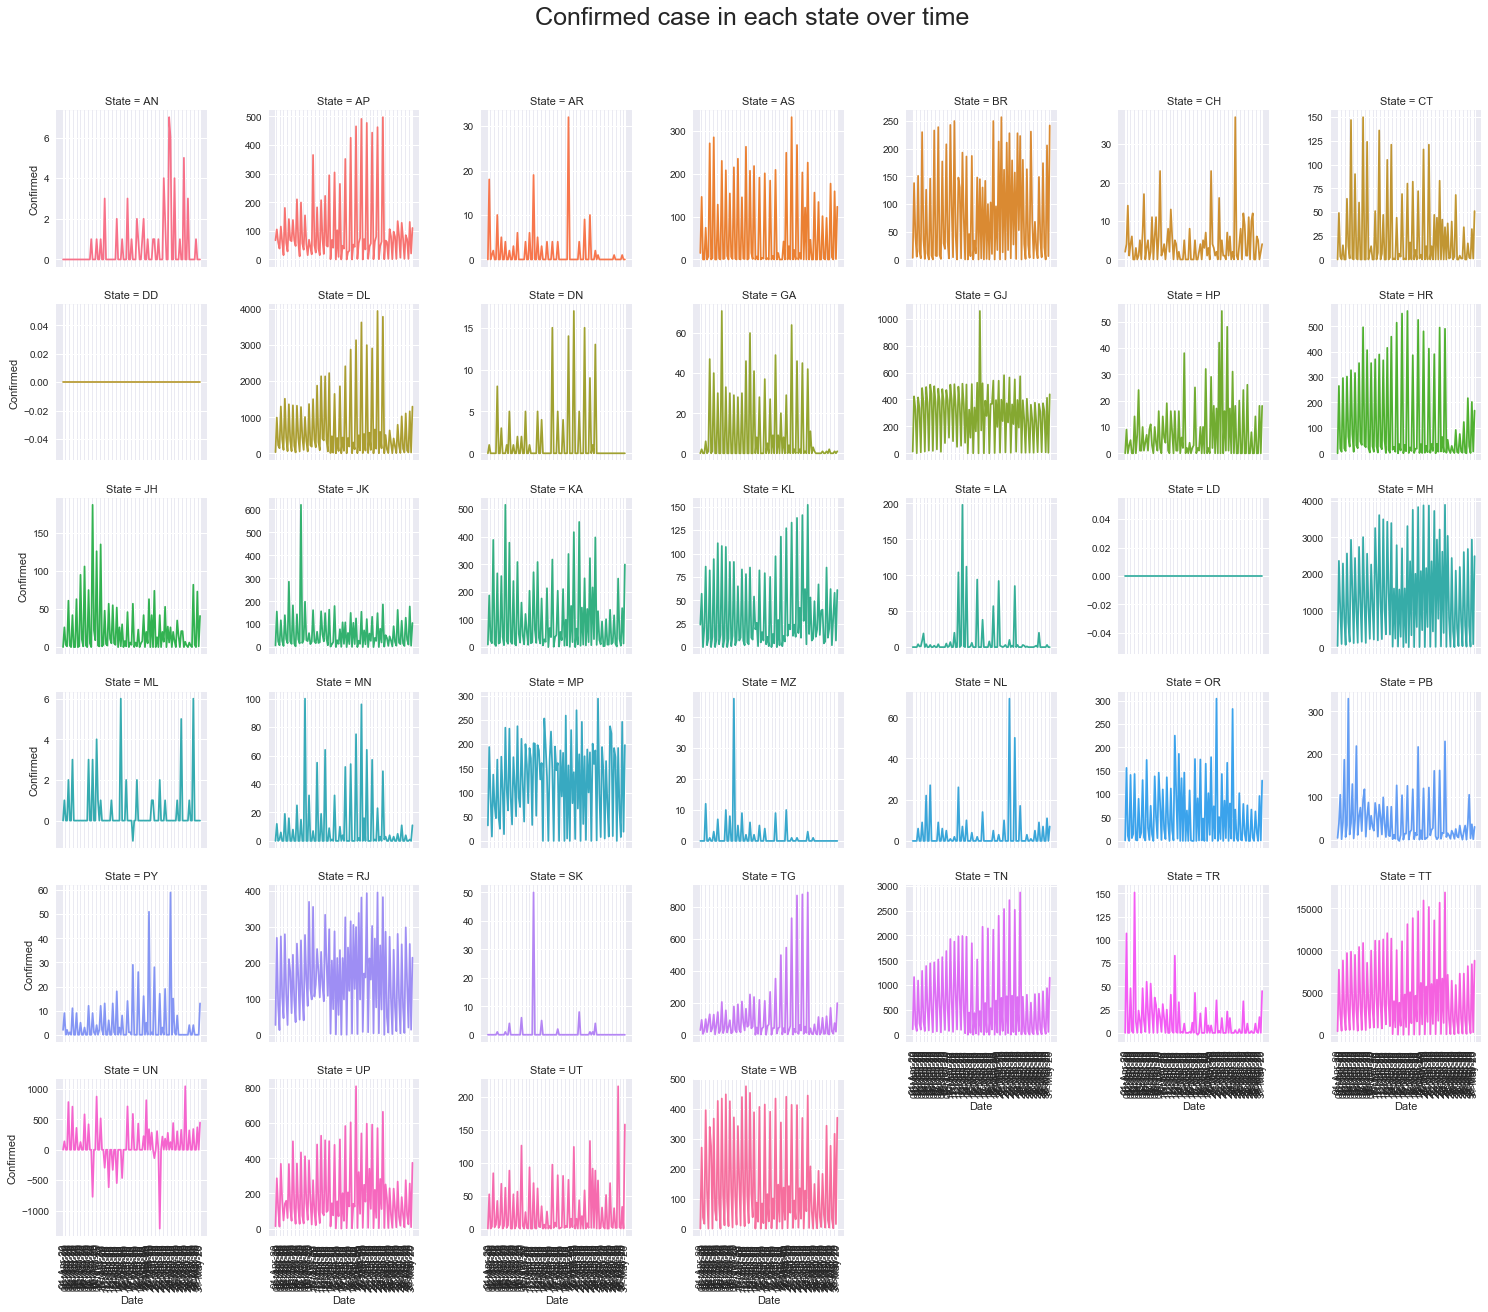

In [29]:
plt.style.use('seaborn')
g = sns.FacetGrid(state_daily_data.sort_values(['State', 'Date']), 
                  col="State", hue="State", 
                  sharey=False, col_wrap=7)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Confirmed case in each state over time', 
               fontsize=25)
plt.show()

### Latest State Level Data

In [30]:
state_wise_data = pd.read_csv(ROOT+'/data/state_level_latest.csv')

In [31]:
state_wise_data.shape

(38, 12)

In [32]:
state_wise_data.head()

State  Confirmed  Recovered  Deaths  Active    Last_Updated_Time  \
0        Total     473643     271688   14907  186993  25/06/2020 10:35:13   
1  Maharashtra     142899      73792    6739   62353  24/06/2020 23:16:15   
2   Tamil Nadu      67468      37763     866   28839  24/06/2020 19:27:14   
3        Delhi      70390      41437    2365   26588  24/06/2020 18:26:15   
4      Gujarat      29001      21096    1736    6169  24/06/2020 21:35:26   

   Migrated_Other State_code  Delta_Confirmed  Delta_Recovered  Delta_Deaths  \
0              55         TT              658                0             0   
1              15         MH                0                0             0   
2               0         TN                0                0             0   
3               0         DL                0                0             0   
4               0         GJ                0                0             0   

                                         State_Notes  
0                                                NaN  
1  15 cases were marked as non-covid deaths in MH...  
2  2 deaths cross notified to other states from C...  
3  Delhi bulletins in the morning, containing dat...  
4                                                NaN

In [33]:
#state_wise_data.State.unique()

In [34]:
#state_wise_data.info()

In [35]:
state_wise_data['Last_Updated_Time'] = pd.to_datetime(state_wise_data['Last_Updated_Time'], errors='coerce')

In [36]:
state_wise_data = state_wise_data[state_wise_data['State']!= 'Total']
state_wise_data = state_wise_data[state_wise_data['State']!= 'State Unassigned']

In [37]:
state_wise_data['death_rate'] = (state_wise_data['Deaths'] / state_wise_data['Confirmed'])*100
state_wise_data['recovery_rate'] = (state_wise_data['Recovered'] / state_wise_data['Confirmed'])*100

In [38]:
#sort based on confirmed cases 
sort_confirmed = state_wise_data.sort_values('Confirmed', ascending=False).reset_index(drop=True)

In [39]:
sort_confirmed = sort_confirmed.loc[:, ['State', 'Confirmed', 'Active', 'Deaths', 'death_rate', 'Recovered', 'recovery_rate']]

In [40]:
sort_confirmed.style.background_gradient(cmap = 'Blues',subset=['Confirmed', 'Active'])\
    .background_gradient(cmap='Reds', subset = ['Deaths', 'death_rate'])\
    .background_gradient(cmap='Greens', subset = ['Recovered', 'recovery_rate'])

In [41]:
#subset columns
temp = sort_confirmed[['Active','Deaths','Recovered']]
temp = temp.melt(value_vars=['Active','Deaths','Recovered'])

In [42]:
#temp

In [43]:
fig = px.treemap(data_frame = temp, path = ['variable'], values='value', height = 200)
fig.show()

In [44]:
state_wise_data.head()

State  Confirmed  Recovered  Deaths  Active   Last_Updated_Time  \
1    Maharashtra     142899      73792    6739   62353 2020-06-24 23:16:15   
2     Tamil Nadu      67468      37763     866   28839 2020-06-24 19:27:14   
3          Delhi      70390      41437    2365   26588 2020-06-24 18:26:15   
4        Gujarat      29001      21096    1736    6169 2020-06-24 21:35:26   
5  Uttar Pradesh      19557      12586     596    6375 2020-06-24 21:46:16   

   Migrated_Other State_code  Delta_Confirmed  Delta_Recovered  Delta_Deaths  \
1              15         MH                0                0             0   
2               0         TN                0                0             0   
3               0         DL                0                0             0   
4               0         GJ                0                0             0   
5               0         UP                0                0             0   

                                         State_Notes  death_rate  \
1  15 cases were marked as non-covid deaths in MH...    4.715918   
2  2 deaths cross notified to other states from C...    1.283571   
3  Delhi bulletins in the morning, containing dat...    3.359852   
4                                                NaN    5.986000   
5                                                NaN    3.047502   

   recovery_rate  
1      51.639270  
2      55.971720  
3      58.867737  
4      72.742319  
5      64.355474

In [45]:
sort_data = state_wise_data.groupby('State').sum()[['Confirmed', 'Recovered', 'Deaths']].sort_values('Confirmed', ascending=False).reset_index()
sort_data.head()

State  Confirmed  Recovered  Deaths
0    Maharashtra     142899      73792    6739
1          Delhi      70390      41437    2365
2     Tamil Nadu      67468      37763     866
3        Gujarat      29001      21096    1736
4  Uttar Pradesh      19557      12586     596

In [46]:
data = [
        go.Bar(name="Confirmed",x=sort_data["State"],y=sort_data["Confirmed"], offsetgroup=0),
        go.Bar(name="Recovered",x=sort_data["State"],y=sort_data["Recovered"], offsetgroup=1),
        go.Bar(name="Deaths",x=sort_data["State"],y=sort_data["Deaths"], offsetgroup=2)
    ]

layout=go.Layout(title="State wise total report", yaxis_title="Number of Cases")

fig1 = go.Figure(data = data, layout= layout)
fig1.update_layout(barmode='group')
fig1.show()

In [47]:
def plot_topn_states(column, color, title, n):
    df = state_wise_data.sort_values(column, ascending=False).reset_index().head(n)
    fig = px.bar(data_frame=df, 
             x=column, 
             y='State', 
             text=column, 
             orientation='h',
             color_discrete_sequence=[color])
    fig.update_layout(title=title, xaxis_title="", yaxis_title="",
                 yaxis_categoryorder = 'total ascending')
    fig.show()

In [48]:
state_wise_data.head(2)

State  Confirmed  Recovered  Deaths  Active   Last_Updated_Time  \
1  Maharashtra     142899      73792    6739   62353 2020-06-24 23:16:15   
2   Tamil Nadu      67468      37763     866   28839 2020-06-24 19:27:14   

   Migrated_Other State_code  Delta_Confirmed  Delta_Recovered  Delta_Deaths  \
1              15         MH                0                0             0   
2               0         TN                0                0             0   

                                         State_Notes  death_rate  \
1  15 cases were marked as non-covid deaths in MH...    4.715918   
2  2 deaths cross notified to other states from C...    1.283571   

   recovery_rate  
1       51.63927  
2       55.97172

In [49]:
plot_topn_states('Confirmed', '#3461eb','Top Confirmed States',10)

In [50]:
plot_topn_states('Recovered', '#34eb40','Top Recover States',10)

In [51]:
plot_topn_states('recovery_rate', '#34eb40','Top Recovery Rate States',10)

In [52]:
plot_topn_states('Deaths', '#111211','Top Mortality State',10)

In [53]:
plot_topn_states('death_rate', '#111211','Top Mortality Rate State',10)

In [54]:
plot_topn_states('Active', '#d90d14','Top Active States',10)

In [55]:
# Confirmed vs Death (Only States with more thatn 10000 cases)
px.scatter(state_wise_data[state_wise_data['Confirmed']>10000], x='Confirmed', y='Deaths', 
           color='State', size='Confirmed',  text='State',
           log_x =True, log_y=True, title='Confirmed vs Death (Only States with more thatn 10000 cases)')

### district level latest

In [56]:
district_level_data = pd.read_csv(ROOT+'/data/district_level_latest.csv')

In [57]:
district_level_data.shape

(799, 16)

In [58]:
district_level_data.head(3)

SlNo State_Code                        State                 District_Key  \
0     0         UN             State Unassigned                UN_Unassigned   
1     1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   

                   District  Confirmed  Active  Recovered  Deceased  \
0                Unassigned       8464    8464          0         0   
1                  Nicobars          0       0          0         0   
2  North and Middle Andaman          1       0          1         0   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
0               0              352           352                0   
1               0                0             0                0   
2               0                0             0                0   

   Delta_Deceased District_Notes  Last_Updated  
0               0            NaN           NaN  
1               0            NaN           NaN  
2               0            NaN           NaN

In [59]:
district_level_data = district_level_data[district_level_data['State']!= 'State Unassigned']

In [60]:
# district wise mortality rate
district_level_data['death_rate'] = (district_level_data['Deceased']/district_level_data['Confirmed']*100)

# district wise recovery rate
district_level_data['recovery_rate'] = (district_level_data['Recovered']/district_level_data['Confirmed']*100)


In [61]:
district_level_data.head()

SlNo State_Code                        State                 District_Key  \
1     1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   
3     3         AN  Andaman and Nicobar Islands             AN_South Andaman   
4     0         AP               Andhra Pradesh          AP_Foreign Evacuees   
5     4         AP               Andhra Pradesh                 AP_Anantapur   

                   District  Confirmed  Active  Recovered  Deceased  \
1                  Nicobars          0       0          0         0   
2  North and Middle Andaman          1       0          1         0   
3             South Andaman         35       3         32         0   
4          Foreign Evacuees        364     285         79         0   
5                 Anantapur       1028     674        347         7   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
1               0                0             0                0   
2               0                0             0                0   
3               0                0             0                0   
4               0                0             0                0   
5               0                0             0                0   

   Delta_Deceased District_Notes  Last_Updated  death_rate  recovery_rate  
1               0            NaN           NaN         NaN            NaN  
2               0            NaN           NaN    0.000000     100.000000  
3               0            NaN           NaN    0.000000      91.428571  
4               0            NaN           NaN    0.000000      21.703297  
5               0            NaN           NaN    0.680934      33.754864

In [62]:
dist_data = district_level_data[['State','District','Confirmed','Active','Recovered', 'Deceased']]
dist_data['Country'] = "India"

In [63]:
fig = px.treemap(
    data_frame = dist_data, 
    path= ['Country', 'State', 'District'],
    values = 'Confirmed'
)
fig.update_layout(title = 'Indian State/District wise Case Distribution',
                 height = 700, width=1000)

fig.show()

In [64]:
district_level_data.head()

SlNo State_Code                        State                 District_Key  \
1     1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   
3     3         AN  Andaman and Nicobar Islands             AN_South Andaman   
4     0         AP               Andhra Pradesh          AP_Foreign Evacuees   
5     4         AP               Andhra Pradesh                 AP_Anantapur   

                   District  Confirmed  Active  Recovered  Deceased  \
1                  Nicobars          0       0          0         0   
2  North and Middle Andaman          1       0          1         0   
3             South Andaman         35       3         32         0   
4          Foreign Evacuees        364     285         79         0   
5                 Anantapur       1028     674        347         7   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
1               0                0             0                0   
2               0                0             0                0   
3               0                0             0                0   
4               0                0             0                0   
5               0                0             0                0   

   Delta_Deceased District_Notes  Last_Updated  death_rate  recovery_rate  
1               0            NaN           NaN         NaN            NaN  
2               0            NaN           NaN    0.000000     100.000000  
3               0            NaN           NaN    0.000000      91.428571  
4               0            NaN           NaN    0.000000      21.703297  
5               0            NaN           NaN    0.680934      33.754864

In [65]:
def plot_top_n(column, th, n):
    df = district_level_data[district_level_data['Confirmed'] > th]
    df = df[df['District']!='Unknown']
    df = df[df['District']!='Other State']
    df = df.sort_values(column, ascending=False).head(n)
    title = str(column) +'(Only districts with more than ' + str(th) +' cases)'

    fig = px.bar(df, x=column, y='District', color='State', 
                 text=column, orientation='h', 
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=title, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending')
    fig.show()

In [66]:
plot_top_n('Confirmed',100,10)

In [67]:
plot_top_n('Active',100,10)

In [68]:
plot_top_n('Recovered',100,10)

In [69]:
plot_top_n('Deceased',100,10)

## Day wise test

In [70]:
test_day = pd.read_csv(ROOT+'/data/tests_day_wise.csv')
test_day.shape

(107, 14)

In [71]:
test_day.head()

Update Time Stamp Tested As Of  Total Samples Tested  \
0  13/03/2020 00:00:00   13/03/2020                6500.0   
1  18/03/2020 18:00:00   18/03/2020               13125.0   
2  19/03/2020 10:00:00   19/03/2020               13316.0   
3  19/03/2020 18:00:00   19/03/2020               14175.0   
4  20/03/2020 10:00:00   20/03/2020               14376.0   

   Total Individuals Tested Total Positive Cases  \
0                    5900.0                   78   
1                   12235.0                  150   
2                   12426.0                  168   
3                   13285.0                  182   
4                   13486.0                  206   

   Tests conducted by Private Labs Sample Reported today  \
0                              NaN                   NaN   
1                              NaN                   NaN   
2                              NaN                   NaN   
3                              NaN                   NaN   
4                              NaN                   NaN   

   Positive cases from samples reported  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

                                        Source Source 1 Test positivity rate  \
0           Press_Release_ICMR_13March2020.pdf      NaN                1.20%   
1      ICMR_website_update_18March_6PM_IST.pdf      NaN                1.14%   
2  ICMR_website_update_19March_10AM_IST_V2.pdf      NaN                1.26%   
3      ICMR_website_update_19March_6PM_IST.pdf      NaN                1.28%   
4     ICMR_website_update_20March_10AM_IST.pdf      NaN                1.43%   

   Individuals Tested Per Confirmed Case  Tests Per Confirmed Case  \
0                                  75.64                     83.33   
1                                  81.57                     87.50   
2                                  73.96                     79.26   
3                                  72.99                     77.88   
4                                  65.47                     69.79   

   Tests per million  
0                5.0  
1               10.0  
2               10.0  
3               11.0  
4               11.0

In [72]:
test_day['Update Time Stamp'] = test_day['Update Time Stamp'].str.extract('(\d{1,2}/\d{1,2}/\d{4})')
test_day['Update Time Stamp'] = pd.to_datetime(test_day['Update Time Stamp'], errors = 'coerce')

In [73]:
test_day.tail(10)

Update Time Stamp Tested As Of  Total Samples Tested  \
97         2020-06-16   15/06/2020             5921069.0   
98         2020-06-17   16/06/2020             6084256.0   
99         2020-06-18   17/06/2020             6249668.0   
100        2020-06-19   18/06/2020             6426627.0   
101        2020-06-20   19/06/2020             6616496.0   
102        2020-06-21   20/06/2020             6807226.0   
103        2020-06-22   21/06/2020             6950493.0   
104        2020-06-23   22/06/2020             7137716.0   
105        2020-06-24   23/06/2020             7352911.0   
106        2020-06-25   24/06/2020             7560782.0   

     Total Individuals Tested Total Positive Cases  \
97                        NaN                  NaN   
98                        NaN                  NaN   
99                        NaN                  NaN   
100                       NaN                  NaN   
101                       NaN                  NaN   
102                       NaN                  NaN   
103                       NaN                  NaN   
104                       NaN                  NaN   
105                       NaN                  NaN   
106                       NaN                  NaN   

     Tests conducted by Private Labs Sample Reported today  \
97                               NaN                154935   
98                               NaN                163187   
99                               NaN                165412   
100                              NaN                176959   
101                              NaN                189869   
102                              NaN                190730   
103                              NaN                143267   
104                              NaN                187223   
105                              NaN                215195   
106                              NaN                207871   

     Positive cases from samples reported  \
97                                    NaN   
98                                    NaN   
99                                    NaN   
100                                   NaN   
101                                   NaN   
102                                   NaN   
103                                   NaN   
104                                   NaN   
105                                   NaN   
106                                   NaN   

                                                Source  \
97   https://t.me/Covid19india_Auxiliary_Test_Data/490   
98   https://t.me/Covid19india_Auxiliary_Test_Data/509   
99   https://t.me/Covid19india_Auxiliary_Test_Data/525   
100  https://t.me/Covid19india_Auxiliary_Test_Data/543   
101  https://t.me/Covid19india_Auxiliary_Test_Data/562   
102  https://t.me/Covid19india_Auxiliary_Test_Data/577   
103  https://t.me/Covid19india_Auxiliary_Test_Data/594   
104  https://t.me/Covid19india_Auxiliary_Test_Data/610   
105  https://twitter.com/ICMRDELHI/status/127563260...   
106  https://twitter.com/ICMRDELHI/status/127599592...   

                                              Source 1 Test positivity rate  \
97                                                 NaN                  NaN   
98                                                 NaN                  NaN   
99                                                 NaN                  NaN   
100                                                NaN                  NaN   
101                                                NaN                  NaN   
102                                                NaN                  NaN   
103  https://twitter.com/ICMRDELHI/status/127491326...                  NaN   
104  https://twitter.com/ICMRDELHI/status/127527761...                  NaN   
105  https://t.me/Covid19india_Auxiliary_Test_Data/628                  NaN   
106                                                NaN                  NaN   

     Individuals Tested Per Confirmed Case  Tests Per Confir

In [74]:
grouped_data = test_day.groupby('Update Time Stamp').mean().reset_index()

In [75]:
grouped_data

Update Time Stamp  Total Samples Tested  Total Individuals Tested  \
0         2020-01-04               47951.0                       NaN   
1         2020-01-05              902654.0                       NaN   
2         2020-01-06             3837207.0                       NaN   
3         2020-02-04               55851.0                       NaN   
4         2020-02-05              976363.0                       NaN   
5         2020-02-06             3966075.0                       NaN   
6         2020-03-04               62962.5                       NaN   
7         2020-03-05             1046450.0                       NaN   
8         2020-03-06             4103233.0                       NaN   
9         2020-03-13                6500.0                    5900.0   
10        2020-03-18               13125.0                   12235.0   
11        2020-03-19               13745.5                   12855.5   
12        2020-03-20               14890.0                   14000.0   
13        2020-03-21               16306.0                   15416.0   
14        2020-03-22               17563.0                   16673.0   
15        2020-03-23               19545.0                   18655.0   
16        2020-03-24               21779.0                   20889.0   
17        2020-03-25               24036.0                   23146.0   
18        2020-03-26                   NaN                       NaN   
19        2020-03-27               27688.0                   26798.0   
20        2020-03-30               38442.0                       NaN   
21        2020-03-31               42788.0                       NaN   
22        2020-04-04               79950.0                       NaN   
23        2020-04-05             1107233.0                       NaN   
24        2020-04-06             4242718.0                       NaN   
25        2020-04-13              217554.0                  202551.0   
26        2020-04-14              244893.0                  229426.0   
27        2020-04-15              274599.0                  258730.0   
28        2020-04-16              302956.0                  286714.0   
29        2020-04-17              335123.0                  318449.0   
..               ...                   ...                       ...   
69        2020-06-14             5658614.0                       NaN   
70        2020-06-15             5774133.0                       NaN   
71        2020-06-16             5921069.0                       NaN   
72        2020-06-17             6084256.0                       NaN   
73        2020-06-18             6249668.0                       NaN   
74        2020-06-19             6426627.0                       NaN   
75        2020-06-20             6616496.0                       NaN   
76        2020-06-21             6807226.0                       NaN   
77        2020-06-22             6950493.0                       NaN   
78        2020-06-23             7137716.0                       NaN   
79        2020-06-24             7352911.0                       NaN   
80        2020-06-25             7560782.0                       NaN   
81        2020-07-04              114015.0                       NaN   
82        2020-07-05             1357413.0                       NaN   
83        2020-07-06             4666386.0                       NaN   
84        2020-08-04              127919.0                       NaN   
85        2020-08-05             1437788.0                       NaN   
86        2020-08-06             4774434.0                       NaN   
87        2020-09-04              144910.0                  130792.0   
88        2020-09-05             1523213.0                       NaN   
89        2020-09-06             4916116.0                       NaN   
90        2020-10-04              161330.0                  147034.0   
91        2020-10-05             1609037.0                       NaN   
92        2020-10-06             5061332.0 

In [76]:
def daily_plot(column, color):
    fig = px.scatter(data_frame = grouped_data, 
               x= "Update Time Stamp", 
               y=column, 
               title=column,
               color_discrete_sequence=[color],
               height = 500,
               width = 800
              )
    fig.update_layout(title = column, xaxis_title="", yaxis_title="")
    fig.show()

In [77]:
grouped_data['Update Time Stamp'].max()

Timestamp('2020-12-06 00:00:00')

In [78]:
daily_plot('Total Samples Tested', '#fceb03')

## State wise test statistics

In [79]:
test_state = pd.read_csv(ROOT+'/data/tests_state_wise.csv')
test_state.shape

(2427, 29)

In [80]:
test_state.head()

Updated On                        State  Total Tested Tag (Total Tested)  \
0  17/04/2020  Andaman and Nicobar Islands        1403.0       Samples Sent   
1  24/04/2020  Andaman and Nicobar Islands        2679.0       Samples Sent   
2  27/04/2020  Andaman and Nicobar Islands        2848.0       Samples Sent   
3  01/05/2020  Andaman and Nicobar Islands        3754.0       Samples Sent   
4  16/05/2020  Andaman and Nicobar Islands        6677.0       Samples Sent   

   Positive Negative  Unconfirmed  Cumulative People In Quarantine  \
0      12.0     1210        181.0                              NaN   
1      27.0      NaN        246.0                              NaN   
2      33.0      NaN        106.0                              NaN   
3      33.0      NaN        199.0                              NaN   
4      33.0      NaN        136.0                              NaN   

   Total People Currently in Quarantine Tag (People in Quarantine)  \
0                                   NaN                        NaN   
1                                 614.0              Institutional   
2                                 724.0              Institutional   
3                                 643.0              Institutional   
4                                  16.0              Institutional   

   Total People Released From Quarantine  People in ICU  \
0                                    NaN            NaN   
1                                  347.0            NaN   
2                                  420.0            NaN   
3                                  556.0            NaN   
4                                 1196.0            NaN   

   People on Ventilators  Num Isolation Beds  Num ICU Beds  Num Ventilators  \
0                    NaN                50.0           NaN              NaN   
1                    NaN                50.0           NaN              NaN   
2                    NaN                50.0           NaN              NaN   
3                    NaN                50.0           NaN              NaN   
4                    NaN                98.0           NaN              NaN   

   Total PPE  Total N95 Masks  Corona Enquiry Calls  Num Calls State Helpline  \
0        NaN              NaN                   NaN                       NaN   
1        NaN              NaN                   NaN                     280.0   
2        NaN              NaN                   NaN                     298.0   
3        NaN              NaN                   NaN                     340.0   
4        NaN              NaN                   NaN                     471.0   

                               Source1 Unnamed: 21 Source2  Unnamed: 23  \
0         https://t.me/indiacovid/2550         NaN     NaN          NaN   
1  https://t.me/indiacovid/3147?single         NaN     NaN          NaN   
2  https://t.me/indiacovid/3365?single         NaN     NaN          NaN   
3         https://t.me/indiacovid/3781         NaN     NaN          NaN   
4         https://t.me/indiacovid/4925         NaN     NaN          NaN   

  Test positivity rate  Tests per thousand  Tests per million  \
0                0.86%                3.53             3534.0   
1                1.01%                6.75             6748.0   
2                1.16%                7.17             7174.0   
3                0.88%                9.46             9456.0   
4                0.49%               16.82            16819.0   

   Tests per positive case  Population NCP 2019 Projection  
0                    117.0                        397000.0  
1                     99.0                        397000.0  
2                     86.0                        397000.0  
3                    114.0                        397000.0  
4                    202.0                        397000.0

In [81]:
test_state.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

### Patient Level Data

In [82]:
patient_df = pd.read_csv(ROOT+'/data/patients_data.csv')

In [83]:
patient_df.head()

Patient Number State Patient Number Date Announced  Estimated Onset Date  \
0             1.0             KL-TS-P1     30/01/2020                   NaN   
1             2.0             KL-AL-P1     02/02/2020                   NaN   
2             3.0             KL-KS-P1     03/02/2020                   NaN   
3             4.0                DL-P1     02/03/2020                   NaN   
4             5.0                TS-P1     02/03/2020                   NaN   

  Age Bracket Gender             Detected City Detected District  \
0          20      F                  Thrissur          Thrissur   
1         NaN    NaN                 Alappuzha         Alappuzha   
2         NaN    NaN                 Kasaragod         Kasaragod   
3          45      M  East Delhi (Mayur Vihar)        East Delhi   
4          24      M                 Hyderabad         Hyderabad   

  Detected State State code Current Status  \
0         Kerala         KL      Recovered   
1         Kerala         KL      Recovered   
2         Kerala         KL      Recovered   
3          Delhi         DL      Recovered   
4      Telangana         TG      Recovered   

                                               Notes  \
0                               Travelled from Wuhan   
1                               Travelled from Wuhan   
2                               Travelled from Wuhan   
3                      Travelled from Austria, Italy   
4  Travelled from Dubai to Bangalore on 20th Feb,...   

  Contracted from which Patient (Suspected) Nationality Type of transmission  \
0                                       NaN       India             Imported   
1                                       NaN       India             Imported   
2                                       NaN       India             Imported   
3                                       NaN       India             Imported   
4                                       NaN       India             Imported   

  Status Change Date                                           Source_1  \
0         14/02/2020  https://twitter.com/vijayanpinarayi/status/122...   
1         14/02/2020  https://www.indiatoday.in/india/story/kerala-r...   
2         14/02/2020  https://www.indiatoday.in/india/story/kerala-n...   
3         15/03/2020  https://www.indiatoday.in/india/story/not-a-ja...   
4         02/03/2020  https://www.deccanherald.com/national/south/qu...   

                                            Source_2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                            Source_3  \
0                                                NaN   
1                                                NaN   
2  https://weather.com/en-IN/india/news/news/2020...   
3                                                NaN   
4  https://www.thehindu.com/news/national/coronav...   

                                 Backup Notes  Num cases  Entry_ID  Num Cases  
0                          Student from Wuhan        1.0       NaN        NaN  
1                          Student from Wuhan        1.0       NaN        NaN  
2                          Student from Wuhan        1.0       NaN        NaN  
3         Travel history to Italy and Austria        1.0       NaN        NaN  
4  Travel history to Dubai, Singapore contact        1.0       NaN        NaN

In [84]:
patient_df.shape

(100284, 23)

In [85]:
patient_df['Nationality'].unique()

array(['India', 'Italy', 'Canada', 'United Kingdom', 'Phillipines',
       'Indonesia', nan, 'Thailand', 'United States of America', 'Tibet',
       'Malaysia', 'Myanmar', 'Removed due to change in bulletin'],
      dtype=object)

In [86]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100284 entries, 0 to 100283
Data columns (total 23 columns):
Patient Number                               99793 non-null float64
State Patient Number                         23253 non-null object
Date Announced                               100284 non-null object
Estimated Onset Date                         0 non-null float64
Age Bracket                                  37841 non-null object
Gender                                       40548 non-null object
Detected City                                7850 non-null object
Detected District                            92399 non-null object
Detected State                               100275 non-null object
State code                                   100275 non-null object
Current Status                               100282 non-null object
Notes                                        38390 non-null object
Contracted from which Patient (Suspected)    1923 non-null object
Nationality       

In [87]:
# fixing date format
date_column = ['Date Announced', 'Estimated Onset Date', 'Status Change Date']
for col in date_column:
    patient_df[col] = pd.to_datetime(patient_df[col], errors='coerce', format='%d/%m/%Y')

In [88]:
patient_df.head()

Patient Number State Patient Number Date Announced Estimated Onset Date  \
0             1.0             KL-TS-P1     2020-01-30                  NaT   
1             2.0             KL-AL-P1     2020-02-02                  NaT   
2             3.0             KL-KS-P1     2020-02-03                  NaT   
3             4.0                DL-P1     2020-03-02                  NaT   
4             5.0                TS-P1     2020-03-02                  NaT   

  Age Bracket Gender             Detected City Detected District  \
0          20      F                  Thrissur          Thrissur   
1         NaN    NaN                 Alappuzha         Alappuzha   
2         NaN    NaN                 Kasaragod         Kasaragod   
3          45      M  East Delhi (Mayur Vihar)        East Delhi   
4          24      M                 Hyderabad         Hyderabad   

  Detected State State code Current Status  \
0         Kerala         KL      Recovered   
1         Kerala         KL      Recovered   
2         Kerala         KL      Recovered   
3          Delhi         DL      Recovered   
4      Telangana         TG      Recovered   

                                               Notes  \
0                               Travelled from Wuhan   
1                               Travelled from Wuhan   
2                               Travelled from Wuhan   
3                      Travelled from Austria, Italy   
4  Travelled from Dubai to Bangalore on 20th Feb,...   

  Contracted from which Patient (Suspected) Nationality Type of transmission  \
0                                       NaN       India             Imported   
1                                       NaN       India             Imported   
2                                       NaN       India             Imported   
3                                       NaN       India             Imported   
4                                       NaN       India             Imported   

  Status Change Date                                           Source_1  \
0         2020-02-14  https://twitter.com/vijayanpinarayi/status/122...   
1         2020-02-14  https://www.indiatoday.in/india/story/kerala-r...   
2         2020-02-14  https://www.indiatoday.in/india/story/kerala-n...   
3         2020-03-15  https://www.indiatoday.in/india/story/not-a-ja...   
4         2020-03-02  https://www.deccanherald.com/national/south/qu...   

                                            Source_2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                            Source_3  \
0                                                NaN   
1                                                NaN   
2  https://weather.com/en-IN/india/news/news/2020...   
3                                                NaN   
4  https://www.thehindu.com/news/national/coronav...   

                                 Backup Notes  Num cases  Entry_ID  Num Cases  
0                          Student from Wuhan        1.0       NaN        NaN  
1                          Student from Wuhan        1.0       NaN        NaN  
2                          Student from Wuhan        1.0       NaN        NaN  
3         Travel history to Italy and Austria        1.0       NaN        NaN  
4  Travel history to Dubai, Singapore contact        1.0       NaN        NaN

In [89]:
patient_df['Age Bracket'].unique()

array(['20', nan, '45', '24', '69', '55', '70', '16', '27', '59', '65',
       '75', '54', '53', '61', '25', '63', '46', '3', '48', '40', '47',
       '13', '96', '89', '85', '68', '26', '33', '76', '37', '43', '21',
       '42', '44', '51', '31', '32', '29', '67', '49', '52', '22', '18',
       '34', '28', '56', '35', '50', '30', '38', '23', '19', '58', '41',
       '2', '60', '74', '39', '17', '36', '57', '64', '81', '62', '73',
       '9', '7', '66', '12', '1', '14', '11', '6', '28-35', '92', '72',
       '15', '77', '10', '80', '71', '78', '79', '90', '4', '8', '5',
       '1.5', '48.0', '55.0', '57.0', '58.0', '66.0', '32.0', '2.0',
       '17.0', '13.0', '30.0', '50.0', '19.0', '40.0', '28.0', '64.0',
       '24.0', '7.0', '36.0', '27.0', '25.0', '21.0', '47.0', '10.0',
       '34.0', '38.0', '14.0', '22.0', '23.0', '26.0', '45.0', '16.0',
       '18.0', '60.0', '12.0', '67.0', '29.0', '61.0', '80.0', '39.0',
       '31.0', '20.0', '37.0', '54.0', '42.0', '43.0', '35.0', '46.0',


In [90]:
px.histogram(patient_df, x='Age Bracket', color_discrete_sequence = ['#eb8888'], 
             nbins=50, title='Distribution of ages of confirmed patients')

In [91]:
temp = patient_df[['Age Bracket', 'Gender']].dropna()

In [92]:
fig = px.histogram(x = temp[temp['Gender'] == 'F']['Age Bracket'], nbins=50, title='Female', color_discrete_sequence = ['#1f1c1c'])
fig.show()

In [93]:
fig = px.histogram(x = temp[temp['Gender'] == 'M']['Age Bracket'], nbins=50, title='Male', color_discrete_sequence = ['#5b9ae3'])
fig.show()

In [94]:
temp['Gender'].unique()

array(['F', 'M', 'Non-Binary', 'M '], dtype=object)

In [95]:
temp['Gender'] = temp['Gender'].str.replace('M ','M')
temp.drop(temp[temp['Gender'] == 'Non-Binary'].index, axis=0, inplace=True)

In [96]:
fig = px.histogram(data_frame = temp, x = ['Age Bracket'], color='Gender', title='Gender vs Age')
fig.show()

In [97]:
temp.groupby('Gender').count().values.reshape(-1).tolist()

[12188, 24926]

In [98]:
fig = px.pie(data_frame=temp, 
             values = temp.groupby('Gender').count().values.reshape(-1).tolist(), 
             labels=['Female', 'Male'], 
            )
fig.show()

In [99]:
# type of transmission
patient_df['Type of transmission'].unique()

array(['Imported', 'Local', 'TBD', nan, 'Imported ', 'Unknown'],
      dtype=object)

In [100]:
patient_df['Type of transmission'] = patient_df['Type of transmission'].replace('Imported ','Imported')
patient_df['Type of transmission'] = patient_df['Type of transmission'].replace('Unknown','TBD')

patient_df.isnull().mean()

Patient Number                               0.004896
State Patient Number                         0.768129
Date Announced                               0.000000
Estimated Onset Date                         1.000000
Age Bracket                                  0.622662
Gender                                       0.595668
Detected City                                0.921722
Detected District                            0.078627
Detected State                               0.000090
State code                                   0.000090
Current Status                               0.000020
Notes                                        0.617187
Contracted from which Patient (Suspected)    0.980824
Nationality                                  0.972987
Type of transmission                         0.970185
Status Change Date                           0.722987
Source_1                                     0.018188
Source_2                                     0.949224
Source_3                    

In [101]:
patient_df.shape

(100284, 23)

In [102]:
patient_df.groupby('Type of transmission').count()

Patient Number  State Patient Number  Date Announced  \
Type of transmission                                                         
Imported                         632                   204             632   
Local                           1720                   911            1720   
TBD                              638                    33             638   

                      Estimated Onset Date  Age Bracket  Gender  \
Type of transmission                                              
Imported                                 0          400     393   
Local                                    0          691    1062   
TBD                                      0           60      65   

                      Detected City  Detected District  Detected State  \
Type of transmission                                                     
Imported                        393                628             632   
Local                           437               1700            1720   
TBD                             131                569             638   

                      State code  Current Status  Notes  \
Type of transmission                                      
Imported                     632             632    632   
Local                       1720            1720   1719   
TBD                          638             638    631   

                      Contracted from which Patient (Suspected)  Nationality  \
Type of transmission                                                           
Imported                                                     57          536   
Local                                                      1302          705   
TBD                                                           7           99   

                      Status Change Date  Source_1  Source_2  Source_3  \
Type of transmission                                                     
Imported                             630       627       424       117   
Local                               1719      1690       637        87   
TBD                                  638       638       136        11   

                      Backup Notes  Num cases  Entry_ID  Num Cases  
Type of transmission                                                
Imported                       237        632         0          0  
Local                          100       1720         0          0  
TBD                             24        638         0          0

In [103]:
temp = pd.DataFrame(patient_df[['Type of transmission']].groupby('Type of transmission')['Type of transmission'].count())
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')
temp

Type of transmission  count
0             Imported    632
2                  TBD    638
1                Local   1720

In [104]:
fig = px.bar(data_frame=temp, 
             x='count', 
             y='Type of transmission',
             orientation = 'h',
             text = 'count',
             width=600, height=300,
             color_discrete_sequence = ['#35495e'],
             title='Different Types of Transmission'
            )
fig.show()